<a href="https://colab.research.google.com/github/psyducc/marketanalytics/blob/main/Market_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook ini merupakan analisa dan eksplorasi dari dataset "Marketing Analytics" yang diupload oleh Jack Daoud pada website kaggle.com

link dataset : https://www.kaggle.com/jackdaoud/marketing-data

In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
!pwd

/content/gdrive/My Drive/Colab Notebooks


In [4]:
df = pd.read_csv('marketing_data.csv')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Keanehan pada kolom
1. penulisan ' income' pakai spasi
2. tipe data pada 'Dt_time'
3. menghapus tanda '$' pada 'income' dan merubah ke float

In [7]:
# Hapus spasi
df.columns = df.columns.str.replace(' ', '')
# Ubah tipe data Dt_time
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])
# Perbaikan variabel 'income'
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **Cek null value**

In [68]:
# cek null values pada tiap kolom
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Ada 24 null values pada kolom 'Income'. Coba kita cek distribusi dari 'Income'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


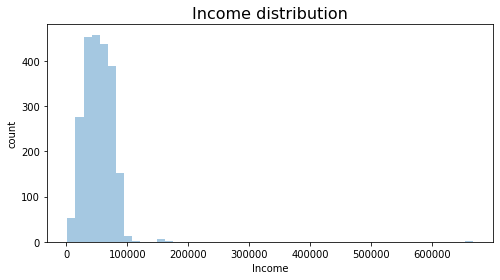

In [69]:
# pembuatan histogram
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

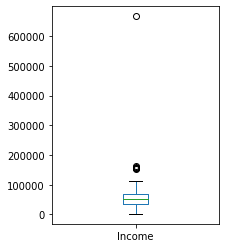

In [70]:
# pembuatan boxplot
df['Income'].plot(kind='box', figsize=(3,4))

Kolom ini memiliki beberapa outlier. Jadi kita akan menggantikan null values pada kolom ini menjadi median nya.

In [71]:
# median dari 'Income'
med_income = df['Income'].median()
med_income

51381.5

In [72]:
# Ganti null values menjadi median
df['Income'] = df['Income'].fillna(med_income)

# **Pembagian Data**

Sebelum dilakukan eksplorasi lebih jauh, data akan dibagi menjadi 2:
1. Data categorical berupa data string
2. Data numerical berupa data numeric integer atau float

In [73]:
# pembuatan dataframe untuk data categorical
df_cat = df.loc[:,df.dtypes==np.object]
num = ['Year_Birth','Income','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# pembuatan dataframe untuk data numerical
df_num = df[num]

In [28]:
df_cat.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


In [29]:
df_num.head()

,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7


# **Analisis Data Numerical**

In [30]:
df_num.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25037.955891,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [31]:
df_num = df_num.drop(['Dt_Customer'], axis=1)

**Outlier**

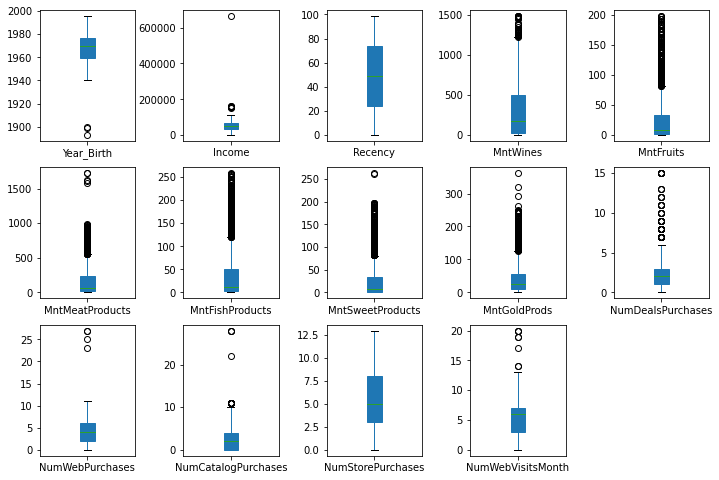

In [74]:
# pembuatan boxplot untuk tiap-tiap variabel pada data numerical
df_num.plot(subplots=True, layout=(5,5), kind='box',patch_artist=True, figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

Ada dua hal yang menarik pada pengecekan outlier.
1. Ada beberapa customer yang lahir dibawah tahun 1900? Mereka berumur 100 tahun lebih, tidak masuk akal. Untuk kasus ini kita akan menghilangkan data dengan tahun kelahiran lebih dari 1900.
2. Ada customer dengan pendapatan lebih dari 600000 dolar. Either dia sangat kaya atau salah memasukkan data. Untuk kasus ini data kita ubah dengan menjadikan nilainya menjadi median dari 'Income' karena dapat mengganggu proses analisis kedepannya.

In [75]:
# menghapus data yang berkelahiran dibawah 1900
df_num = df_num[df_num['Year_Birth'] > 1900].reset_index(drop=True)

# menghapus data yang memiliki income diatas 600000
df_num.loc[df_num.Income > 600000,'Income'] = med_income

**Distribution**

<Figure size 360x216 with 0 Axes>

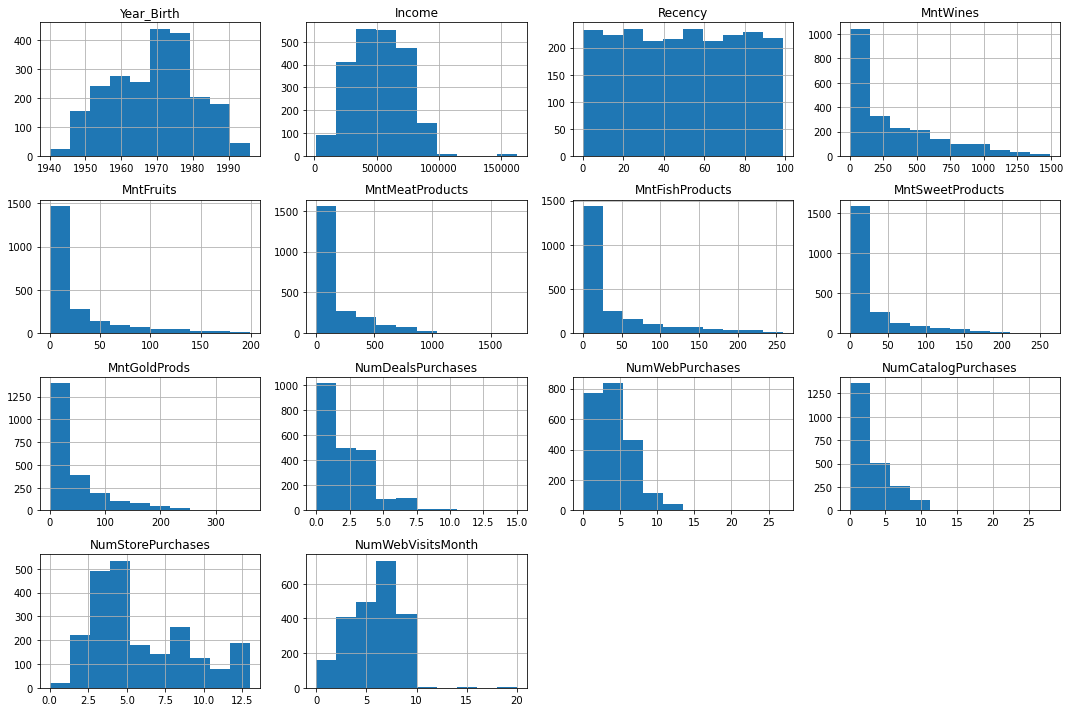

In [76]:
# pembuatan histogram untuk tiap variabel pada data numerical
plt.figure(figsize=(5,3))
df_num.hist(figsize = (15,10))
plt.tight_layout()

Dari Histogram didapatkan insight bahwa customer kebanyakan memiliki pendapatan yang kurang dari $100000 pertahun. Dan ber tahun kelahiran di bawah 1990.

**Correlation**

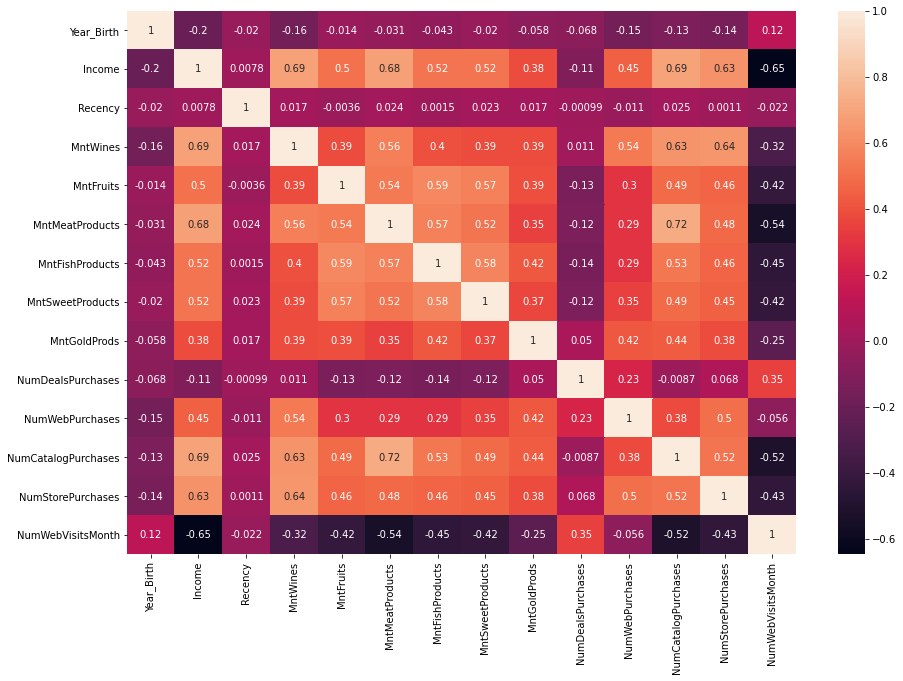

In [77]:
# pembuatan heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(),annot=True)

1. 'Income' memiliki korelasi positif yang kuat dengan 'Purchase' dan 'Amount Spent'. Dan memiliki korelasi negatif yang kuat 'NumWebVisistsMonth'. Yang berarti orang-orang dengan income tinggi jarang mengunjungi website.
2. 'NumWebVisitsMonth' umumnya berkorelasi yang rendah dengan variabel lain, kecuali dengan 'NumDealsPurchases'. Yang berarti kebanyakan orang-orang mengunjungi website untuk melakukan pembelian dengan diskon.
3. Ternyata 'NumWebVisitsMonth' memiliki korelasi yang lemah dengan 'NumWebPurchases', yang berarti tidak semua orang-orang yang mengunjungi website berbelanja lewat website.
4. Tingginya korelasi 'NumStorePurchases' dengan 'MintWines' mengindikasikan orang-orang umumnya berbelanja Wine di toko.
5. Tingginya korelasi 'NumCatalogPurchases' dengan 'MintWines' dan 'MintMeatProdicts' mengindikasikan umumnya orang-orang berbelanja Wine dan Daging melalui katalog.

#**Analisis Data Categorical**

In [51]:
df_cat.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


**Education**

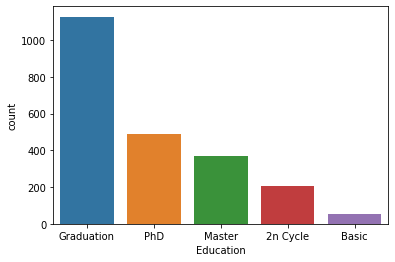

In [78]:
# pembuatan bar chart pendidikan customer
sns.countplot(x = 'Education',
              data = df_cat,
              order = df_cat['Education'].value_counts().index)

Dari grafik dapat dilihat customer terbanyak pada jenjang pendidikan 'Graduation', diikuti 'PhD' dan 'Master Education'

**Marital Status**

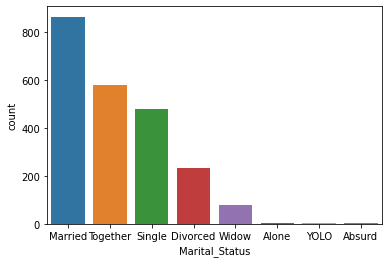

In [79]:
# pembuatan bar chart status perkawinan customer
sns.countplot(x = 'Marital_Status',
              data = df_cat,
              order = df_cat['Marital_Status'].value_counts().index)

Berdasarkan grafik didapatkan bahwa customer merupakan orang-orang berstatus 'Married', diikuti 'Together' dan 'Single'

**Country**

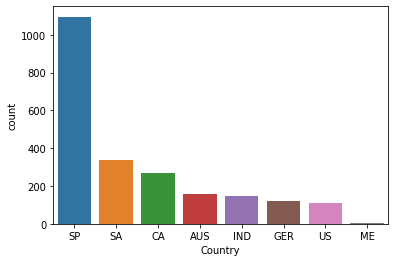

In [80]:
# pembuatan bar chart asal negara customer
sns.countplot(x = 'Country',
              data = df_cat,
              order = df_cat['Country'].value_counts().index)

Dapat dilihat spanyol menjadi negara terbanyak yang melakukan transaksi.

# **Lanjutan**

**Rata-rata demografi customer**

In [81]:
# menetapkan kolom 'Amount Spent' dengan kolom yang mengandung 'Mnt'
mnt_cols = [col for col in df.columns if 'Mnt' in col]
# menetapkan kolom 'Purchases' dengan kolom yang mengandung 'Purchases'
purchases_cols = [col for col in df.columns if 'Purchases' in col]

# pembuatan demografi dengan mengambil rata-rata pada tiap kolom
demographics = pd.DataFrame(round(df.drop(columns=mnt_cols+purchases_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth','Income', 'Kidhome', 'Teenhome'])

demographics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys


,Average
Year_Birth,1968.8
Income,52238.0
Kidhome,0.4
Teenhome,0.5


**Rata-rata pengeluaran customer tiap produk**

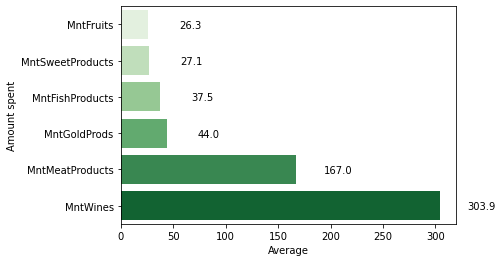

In [87]:
# pembuatan variabel spending dengan mengambil rata-rata pada tiap kolom 'Amount Spent'
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

ax = sns.barplot(x='Average', y='index', data=spending, palette='Greens')
plt.ylabel('Amount spent')

for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

'Wine' dan 'Meat' menjadi produk berperforma paling baik.

**Media penjualan terbaik**

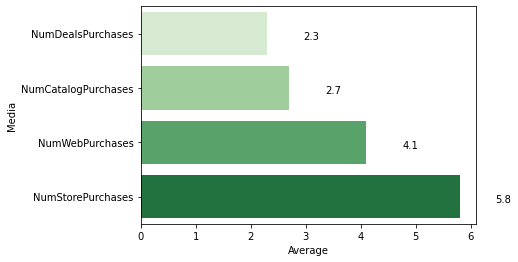

In [88]:
# pembuatan variabel media dengan mengambil rata-rata pada tiap kolom 'Purchases'
media = pd.DataFrame(round(df[purchases_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

ax = sns.barplot(x='Average', y='index', data=media, palette='Greens')
plt.ylabel('Media')

for p,q in zip(ax.patches, media['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

Penjualan terbaik didapat melalui Toko dan diikuti oleh Website